# Downside Measures

In [33]:
import pandas as pd
import numpy as np
import risk_kit as erk
import matplotlib as mpl

In [34]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
%autoreload 2

In [4]:
hfi = erk.get_hfi_returns()

/Users/nicholasflores/Documents/GitHub/data-science-python/finance-ml/risk_kit.py:41: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("finance-ml-data/edhec-hedgefundindices.csv",


In [37]:
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


## Semi-Deviation

In [5]:
hfi.std(ddof=0) 

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [6]:
#we care about returns being lower than average

In [7]:
#negative semi-deviation --> look at returns below 0 and calculate STD
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### Value at Risk (VaR) and Conditional VaR
- Historic VaR
- Parametric VaR (Gaussian)
- Modified VaR // Cornish-Fisher VAR

In [8]:
np.percentile(hfi,5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [9]:
np.percentile(hfi,5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [10]:
def var_historic(returns, level=5):
    """
    VaR Historic
    """
    if isinstance(returns, pd.DataFrame):
        return returns.aggregate(var_historic, level=level)
        
    elif isinstance(returns, pd.Series):
        return -np.percentile(returns, level) 
        
    else:
        raise TypeError("Expected returns to be a series or dataframe")

In [11]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [13]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [14]:
from scipy.stats import norm

In [17]:
z = norm.ppf(0.05)

In [18]:
z

-1.6448536269514729

In [21]:
-(hfi.mean() +z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [25]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## Cornish-Fisher

In [ ]:
## It's not a gaussian distribution. We should change the Z-Score for the Skewness and Kurtosis

In [27]:
var_list = [erk.var_gaussian(hfi),erk.var_gaussian(hfi,modified=True),erk.var_historic(hfi)]

In [29]:
comparison=pd.concat(var_list,axis=1)
comparison.columns = ["Gaussian","Cornish-Fisher","Historic"]

<Axes: title={'center': 'Hedge Fund: VaR'}>

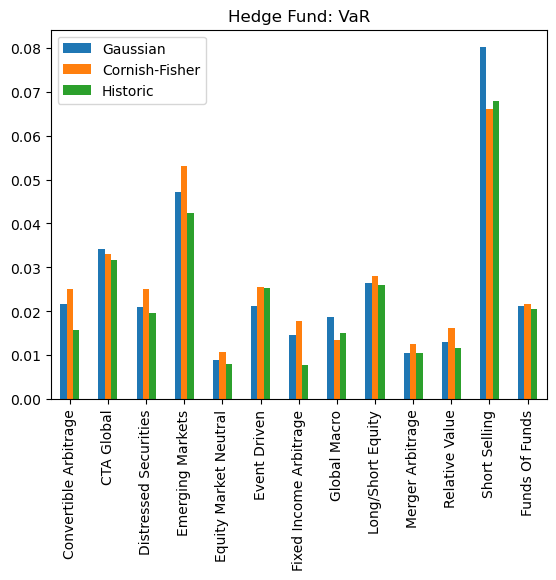

In [31]:
comparison.plot.bar(title="Hedge Fund: VaR")

## Beyond VaR: Conditional VaR

In [36]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64